# **LSTM(Long Short Term Memory network)**

*   List item
*   List item



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
apple_data=pd.read_csv("/content/drive/MyDrive/Data set/AAPL (1).csv")
apple_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-03,123.519997,123.779999,122.209999,122.940002,121.481689,78967600
1,2020-12-04,122.599998,122.860001,121.519997,122.250000,120.799881,78260400
2,2020-12-07,122.309998,124.570000,122.250000,123.750000,122.282082,86712000
3,2020-12-08,124.370003,124.980003,123.089996,124.379997,122.904617,82225500
4,2020-12-09,124.529999,125.949997,121.000000,121.779999,120.335449,115089200
5,2020-12-10,120.500000,123.870003,120.150002,123.239998,121.778137,81312200
6,2020-12-11,122.430000,122.760002,120.550003,122.410004,120.957977,86939800
7,2020-12-14,122.599998,123.349998,121.540001,121.779999,120.335449,79184500
8,2020-12-15,124.339996,127.900002,124.129997,127.879997,126.363091,157243700
9,2020-12-16,127.410004,128.369995,126.559998,127.809998,126.293915,98208600


In [ ]:
apple_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,147.396171,149.189842,145.691547,147.516310,146.636255,9.016616e+07
std,15.798971,16.017025,15.609578,15.832322,16.009778,2.720061e+07
min,119.029999,120.400002,116.209999,116.360001,115.151566,3.519590e+07
25%,134.704994,135.710003,133.334999,134.482498,133.085854,7.127635e+07
50%,146.875000,148.720001,145.555001,147.049996,146.316201,8.563055e+07
75%,159.575004,161.885002,156.577499,159.240002,158.598656,1.037679e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,1.954327e+08


In [ ]:
apple_data.shape

(504, 7)

In [ ]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Open       504 non-null    float64
 2   High       504 non-null    float64
 3   Low        504 non-null    float64
 4   Close      504 non-null    float64
 5   Adj Close  504 non-null    float64
 6   Volume     504 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB


In [ ]:
apple_data['Date']=pd.to_datetime(apple_data['Date'])

In [ ]:
print(f"Dataframe contains stock prices between{apple_data.Date.min()} and {apple_data.Date.max()}")
print(f"Total no.of days={apple_data.Date.max()-apple_data.Date.min()}")

Dataframe contains stock prices between2020-12-03 00:00:00 and 2022-12-02 00:00:00
Total no.of days=729 days 00:00:00


In [ ]:
x=apple_data[['Open','High','Low','Adj Close']].values

In [ ]:
y=apple_data['Close'].values

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we considered the closing price as the target variable.

In [ ]:
# splitting x and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
apple_data1 = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':predicted_values.flatten()})

In [ ]:
apple_data1.head(10)

,Actual,Predicted
0,134.500000,134.287018
1,134.720001,134.372223
2,152.339996,152.770474
3,165.750000,165.773758
4,136.720001,136.988002
5,131.970001,131.696798
6,158.520004,158.311975
7,161.509995,161.979175
8,148.559998,148.206839
9,148.479996,148.092687


In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = apple_data.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(apple_data)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

In [ ]:
train = dataset[0:250,:]
valid = dataset[250:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting testing values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

190/190 - 9s - loss: 0.0069 - 9s/epoch - 45ms/step
8/8 [==============================] - 1s 19ms/step


<ipython-input-29-a068aacd33a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


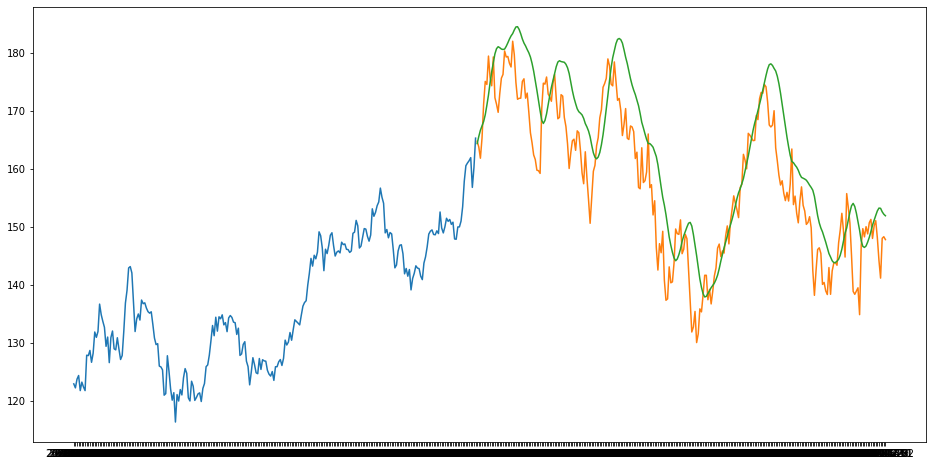

In [ ]:
#for plotting
train = new_data[:250]
valid = new_data[250:]
valid['Predictions'] = closing_price

plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [ ]:
dframe3 = pd.DataFrame({'Actual':valid['Close'], 'Predicted':valid['Predictions']})

In [ ]:
dframe3.head(10)

,Actual,Predicted
Date,,
2021-12-01,164.770004,164.366165
2021-12-02,163.759995,165.593201
2021-12-03,161.839996,166.664047
2021-12-06,165.320007,167.408707
2021-12-07,171.179993,168.166473
2021-12-08,175.080002,169.327362
2021-12-09,174.559998,170.957657
2021-12-10,179.449997,172.726669
2021-12-13,175.740005,174.855789
